## Using Bron-Kerbosch

In [28]:
from term_grouping import *
from print_cliques import print_cliques
import matplotlib.pyplot as plt
from collections import Counter
import time
import numpy as np

plt.rcParams["font.size"] = 13
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams["xtick.labelsize"] = 13
plt.rcParams["ytick.labelsize"] = 13

In [23]:
hfile = 'hamiltonians/sampleH2.txt'
H = parseHamiltonian(hfile)

ops = [term[1] for term in H]
Nq = max([len(op) for op in ops])
print('{} qubits'.format(Nq))

for commutativity_type in [QWCCommutativity, FullCommutativity]:
    cliques = genMeasureCircuit(H, Nq, commutativity_type)
    for cliq in cliques:
        print(cliq)
    print()

8 qubits
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.12s
{'Z**Z****', '**Z*****', '**Z***Z*', '**ZZ****', '***Z****', '*Z****Z*', '***ZZ***', '****Z**Z', '*Z**Z***', 'Z*****Z*', 'Z******Z', '*ZZ*****', '***Z*Z**', '**Z****Z', 'Z*Z*****', '*****ZZ*', '*Z***Z**', '****ZZ**', 'ZZ******', '***Z**Z*', '*Z*Z****', '***Z***Z', '******ZZ', '****Z***', '*****Z**', '******Z*', '*Z*****Z', '****Z*Z*', '*Z******', '**Z**Z**', '**Z*Z***', '*******Z', '*****Z*Z', 'Z****Z**', 'Z*******', 'Z***Z***'}
{'*XYYX***', 'XX****YY', '***YXXY*', '**YYXX**', 'XXYY****', '****XXYY'}
{'***XYYX*', '**XXYY**', 'YY****XX', '*YXXY***', '****YYXX', 'YYXX****'}
{'*YYXX***', '**YXXY**', '****XYYX', 'XY****YX', 'XYYX****', '***XXYY*'}
{'****YXXY', '**XYYX**', 'YX****XY', '*XXYY***', 'YXXY****', '***YYXX*'}
{'XZZZX*Z*', 'XZ*ZX***', 'XZZZX***', 'XZZZXZ**', 'X*ZZX***', 'XZZZX**Z', 'XZZ*X***'}
{'YZZZY**Z', 'YZZZY*Z*'

In [2]:
def print_cliques_loc(filelist):
    for file in filelist:
        print('--------------')
        print(file)
        H = parseHamiltonian(file)
    
        # For some qubit encodings, there isn't a single term acting on all qubits
        # so this will report the wrong qubit#
        # Instead, look for the largest index being operated on.
        ops = [term[1] for term in H]
        #Nq = max([len(op) for op in ops])
        Nq = max([int(op[-1][1:]) for op in ops]) + 1
        print('{} qubits'.format(Nq))
    
        print('{} total terms\n'.format(len(H)))

        for commutativity_type, type_str in zip([QWCCommutativity, FullCommutativity],['QWC','FULL']):
            print(type_str + 'Commutation:')
            cliques = genMeasureCircuit(H, Nq, commutativity_type)
            print()

In [3]:
def many_trials(filename, commutativity_type, numtrials):
    H = parseHamiltonian(filename)
    ops = [term[1] for term in H]
    Nq = max([int(op[-1][1:]) for op in ops]) + 1
    print('--------------')
    print(filename)
    results = []
    runtimes = []
    for i in range(numtrials):
        start_time = time.time()
        cliques = genMeasureCircuit(H, Nq, commutativity_type)
        end_time = time.time()
        results += [len(cliques)]
        runtimes += [end_time - start_time]
    return Counter(results), runtimes

# What is the effect of term grouping across basis representations?

# What is the effect of term grouping across qubit encodings?

In [14]:
# First look at H2 molecule
Hfiles = ['hamiltonians/H2_6-31g_{}_0.7_AS4.txt'.format(e) for e in ['JW','BK','BKSF','BKT','PC']]

print_cliques_loc(Hfiles)

--------------
hamiltonians/H2_6-31g_JW_0.7_AS4.txt
8 qubits
185 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.13s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.08s

--------------
hamiltonians/H2_6-31g_BK_0.7_AS4.txt
8 qubits
185 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.88s

--------------
hamiltonians/H2_6-31g_BKSF_0.7_AS4.txt
28 qubits
461 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamilto

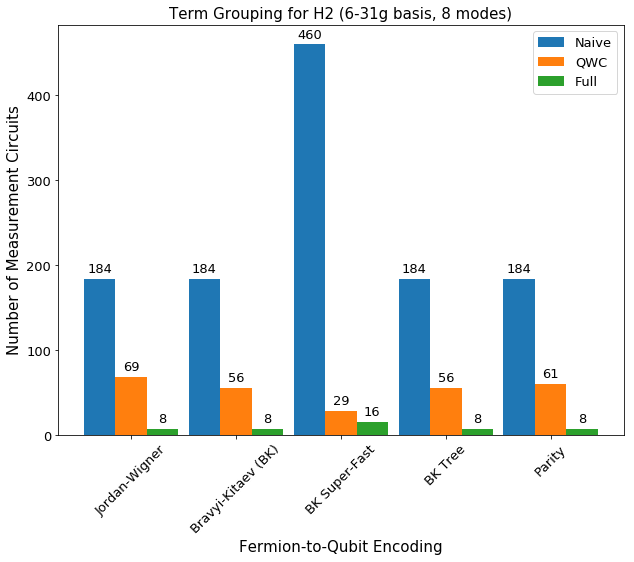

In [29]:
# copying the data printed out above
naive = (184,184,460,184,184)
qwc   = (69,56,29,56,61)
full  = (8,8,16,8,8)

xaxis = np.array((1,2,3,4,5))

width = 0.3

fig, ax = plt.subplots(figsize=(9,8))
rects1 = ax.bar(xaxis - width, naive, width, label='Naive')
rects2 = ax.bar(xaxis, qwc, width, label='QWC')
rects3 = ax.bar(xaxis + width, full, width, label='Full')

ax.set_ylabel('Number of Measurement Circuits')
ax.set_xlabel('Fermion-to-Qubit Encoding')
ax.set_title('Term Grouping for H2 (6-31g basis, 8 modes)')
ax.set_xticks(xaxis)
ax.set_xticklabels(('Jordan-Wigner', 'Bravyi-Kitaev (BK)', 'BK Super-Fast', 'BK Tree', 'Parity'),
                  rotation=30)
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# What is the effect of term grouping across increasing Active Spaces?

In [3]:
Hfiles = ['hamiltonians/H2_6-31g_JW_0.7_AS{}.txt'.format(a) for a in [1,2,3,4]]

print_cliques_loc(Hfiles)

--------------
hamiltonians/H2_6-31g_JW_0.7_AS1.txt
2 qubits
4 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 3 nodes.
MEASURECIRCUIT: BronKerbosch found 1 unique circuits
MEASURECIRCUIT: Elapsed time: 0.000222s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 3 nodes.
MEASURECIRCUIT: BronKerbosch found 1 unique circuits
MEASURECIRCUIT: Elapsed time: 0.000149s

--------------
hamiltonians/H2_6-31g_JW_0.7_AS2.txt
4 qubits
15 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: BronKerbosch found 5 unique circuits
MEASURECIRCUIT: Elapsed time: 0.001745s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: BronKerbosch found 2 unique circuits
MEASURECIRCUIT: Elapsed time: 0.002355s

--------------
hamiltonians/H2_6-31g_JW_0.7_AS3.txt
6 qubits
62 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamilt

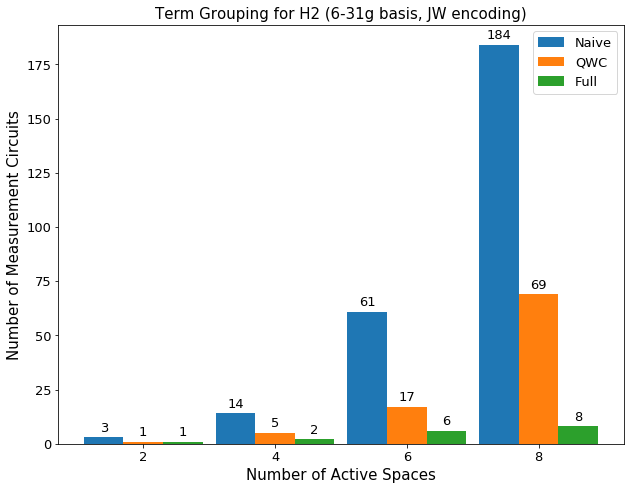

In [29]:
# copying the data printed out above
naive = (3,14,61,184)
qwc   = (1,5,17,69)
full  = (1,2,6,8)

# active spaces (x-axis)
# There is a weird naming convention...
# Openfermion lists active spaces as 1,2,3,4
# But, active spaces always come in pairs so there are actually
# twice as many spaces as what Openfermion says there is... its confusing
AS = np.array((1,2,3,4))

width = 0.3

fig, ax = plt.subplots(figsize=(9,7))
rects1 = ax.bar(AS - width, naive, width, label='Naive')
rects2 = ax.bar(AS, qwc, width, label='QWC')
rects3 = ax.bar(AS + width, full, width, label='Full')

ax.set_ylabel('Number of Measurement Circuits')
ax.set_xlabel('Number of Active Spaces')
ax.set_title('Term Grouping for H2 (6-31g basis, JW encoding)')
ax.set_xticks(AS)
ax.set_xticklabels(('2', '4', '6', '8'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [31]:
def complexity(C,xx):
    return [C*(3**((2*x)/3)) for x in xx]

def complexity2(qq,xx,A,B,C):
    return [A*(3**((2*x)/3)) + B*3*q*x + C*(x**2)*(2*q+2) for q,x in zip(qq,xx)]

In [32]:
nterms = (3,14,61,184)
fulltime = (0.000149,0.002355,0.045602,1.129214)
for h,t in zip(nterms,fulltime):
    print(h,t,t/complexity(1,[h])[0])
    
qwctime = (0.000222,0.001745,0.016043,0.130932)
for h,t in zip(nterms,qwctime):
    print(h,t,t/complexity(1,[h])[0])

3 0.000149 1.6555555555555556e-05
14 0.002355 8.295817716281784e-08
61 0.045602 1.803237228579473e-21
184 1.129214 3.356621265069175e-59
3 0.000222 2.4666666666666665e-05
14 0.001745 6.147007182552746e-08
61 0.016043 6.343874141068481e-22
184 0.130932 3.891991557650164e-60


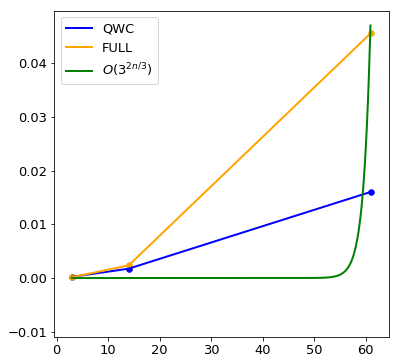

In [33]:
# copying runtime data from above
nterms = (3,14,61)#,184)
qq = (2,4,6,8)
xx = np.arange(nterms[0],nterms[-1],0.1)
cc = complexity(2e-21,xx)
cc2 = complexity2(qq,nterms,2e-21,1e-10,1e-10)
qwctime = (0.000222,0.001745,0.016043)#,0.130932)
fulltime = (0.000149,0.002355,0.045602)#,1.129214)

plt.subplots(figsize=[6,6])

# QWC commutation
plt.scatter(nterms,qwctime,c='blue',s=30)
plt.plot(nterms,qwctime,c='blue',lw=2,label='QWC')

# Full commutation
plt.scatter(nterms,fulltime,c='orange',s=30)
plt.plot(nterms,fulltime,c='orange',lw=2,label='FULL')

# Complexity bounds
plt.plot(xx,cc,c='green',lw=2,label=r'$O(3^{2n/3})$')

#plt.plot(nterms,cc2,c='red',lw=2,label='exact')

plt.legend()

# How does runtime vary across qubit encodings?

In [ ]:
# I will generate this data later (will take ~60 minutes to complete).
# Then we can compare average runtimes.
results = []
for file in Hfiles:
    for comm_type, comm_str in zip([QWCCommutativity, FullCommutativity], ['QWC','FULL']):
        ret, times = many_trials(file, comm_type, 100)
        results += [(file,comm_str,ret,times)]

print('\n\n-------------------')
print('All trials finished')
for r in results:
    print(r[0],r[1],r[2],np.mean(r[3]))

# How does runtime vary across size of Hamiltonian?

In [54]:
def myfunc(filename, commutativity_type):
    H = parseHamiltonian(filename)
    numterms = len(H) - 1
    
    ops = [term[1] for term in H]
    Nq = max([int(op[-1][1:]) for op in ops]) + 1
    
    print('--------------')
    print(filename)
    
    start_time = time.time()
    cliques = genMeasureCircuit(H, Nq, commutativity_type)
    end_time = time.time()
    
    numcliques = [len(cliques)]
    runtime = [end_time - start_time]
    
    return numterms, numcliques, runtime

In [57]:
# try looking at H2O for more datapoints
h2ofiles = ['hamiltonians/H2O_6-31g_BK_104_AS{}.txt'.format(a) for a in [1,2,3,4,5,6]]
print(h2ofiles)

['hamiltonians/H2O_6-31g_BK_104_AS1.txt', 'hamiltonians/H2O_6-31g_BK_104_AS2.txt', 'hamiltonians/H2O_6-31g_BK_104_AS3.txt', 'hamiltonians/H2O_6-31g_BK_104_AS4.txt', 'hamiltonians/H2O_6-31g_BK_104_AS5.txt', 'hamiltonians/H2O_6-31g_BK_104_AS6.txt']


In [ ]:
comtype = QWCCommutativity
numterms, numcliques, runtimes = [], [], []
for f in h2ofiles:
    nt, nc, t = myfunc(f,comtype)
    numterms += [nt]
    numcliques += [nc]
    runtimes += [t]

--------------
hamiltonians/H2O_6-31g_BK_104_AS1.txt
MEASURECIRCUIT: Generated graph for the Hamiltonian with 3 nodes.
MEASURECIRCUIT: BronKerbosch found 1 unique circuits
MEASURECIRCUIT: Elapsed time: 0.000127s
--------------
hamiltonians/H2O_6-31g_BK_104_AS2.txt
MEASURECIRCUIT: Generated graph for the Hamiltonian with 26 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.002170s
--------------
hamiltonians/H2O_6-31g_BK_104_AS3.txt
MEASURECIRCUIT: Generated graph for the Hamiltonian with 61 nodes.
MEASURECIRCUIT: BronKerbosch found 12 unique circuits
MEASURECIRCUIT: Elapsed time: 0.014395s
--------------
hamiltonians/H2O_6-31g_BK_104_AS4.txt
MEASURECIRCUIT: Generated graph for the Hamiltonian with 192 nodes.
MEASURECIRCUIT: BronKerbosch found 43 unique circuits
MEASURECIRCUIT: Elapsed time: 0.169738s
--------------
hamiltonians/H2O_6-31g_BK_104_AS5.txt
MEASURECIRCUIT: Generated graph for the Hamiltonian with 275 nodes.
MEASURECIRCUIT: BronKerbo

# Plot multiple molecules together

In [3]:
# first we need to choose a tractable active space for each molecule
h2files = ['hamiltonians/H2_sto-3g_BK_0.7_AS{}.txt'.format(a) for a in [1,2]]
lihfiles = ['hamiltonians/LiH_sto-3g_BK_1.45_AS{}.txt'.format(a) for a in [1,2,3,4,5,6]]
h2ofiles = ['hamiltonians/H2O_sto-3g_BK_104_AS{}.txt'.format(a) for a in [1,2,3,4,5,6]]
ch4files = ['hamiltonians/CH4_sto-3g_BK_grnd_AS{}.txt'.format(a) for a in [1,2,3,4,5,6,7,8,9]]

Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary coefficient! -- skipping for now
Imaginary c

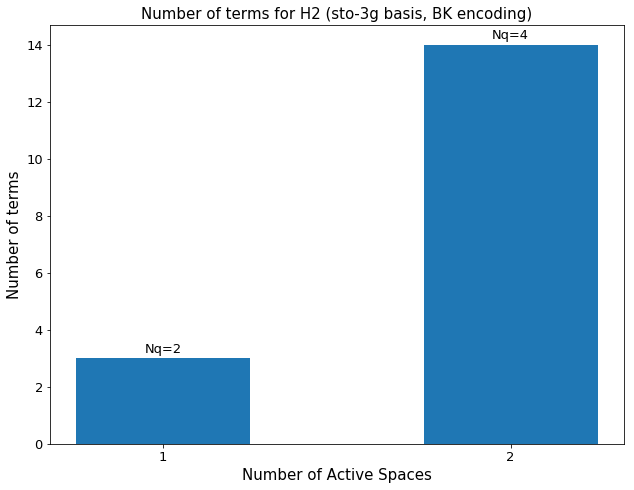

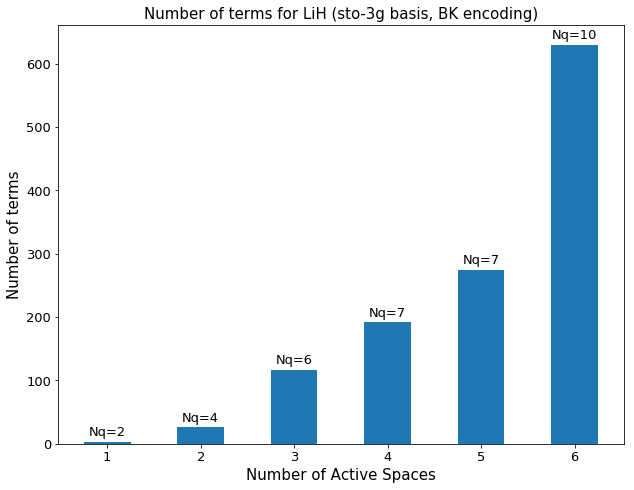

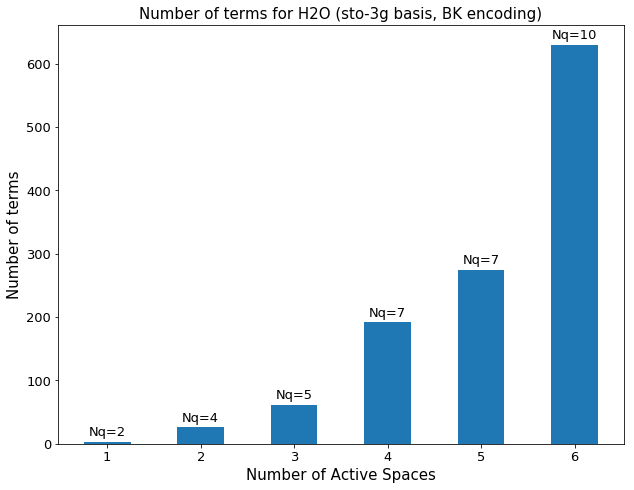

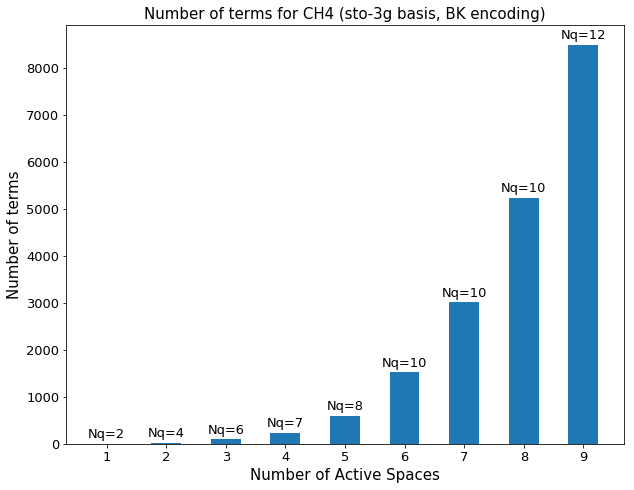

In [6]:
molecule_files = (h2files,lihfiles,h2ofiles,ch4files)

for molecule, mol_name in zip(molecule_files, ['H2','LiH','H2O','CH4']):
    active_spaces, num_terms, nqubits = [], [], []
    for ASnum, asfile in enumerate(molecule):
        ASnum += 1
        #print(ASnum,asfile)
        
        H = parseHamiltonian(asfile)

        ops = [term[1] for term in H]
        Nq = max([len(op) for op in ops])
        
        nqubits += [Nq]
        num_terms += [len(H)-1]
        active_spaces += [ASnum]
        

    width = 0.5

    fig, ax = plt.subplots(figsize=(9,7))
    rects1 = ax.bar(active_spaces, num_terms, width)

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of Active Spaces')
    ax.set_title('Number of terms for {} (sto-3g basis, BK encoding)'.format(mol_name))
    ax.set_xticks(active_spaces)

    def autolabel(rects, qubits, xpos='center'):
        """
        Attach a text label above each bar in *rects*, displaying its height.

        *xpos* indicates which side to place the text w.r.t. the center of
        the bar. It can be one of the following {'center', 'right', 'left'}.
        """

        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0, 'right': 1, 'left': -1}

        for rect, nq in zip(rects,qubits):
            height = rect.get_height()
            ax.annotate('Nq={}'.format(nq),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(offset[xpos]*3, 3),  # use 3 points offset
                        textcoords="offset points",  # in both directions
                        ha=ha[xpos], va='bottom')


    autolabel(rects1, nqubits)

    fig.tight_layout()

In [8]:
# Based on the above results we will look at:
# H2: AS = 2
# LiH: AS = 3
# H2O: AS = 4
# CH4: AS = 4

fs = [h2files[1],lihfiles[2],h2ofiles[3],ch4files[3]]
print(fs)

for f in fs:
    print_cliques(f)

['hamiltonians/H2_sto-3g_BK_0.7_AS2.txt', 'hamiltonians/LiH_sto-3g_BK_1.45_AS3.txt', 'hamiltonians/H2O_sto-3g_BK_104_AS4.txt', 'hamiltonians/CH4_sto-3g_BK_grnd_AS4.txt']
--------------
hamiltonians/H2_sto-3g_BK_0.7_AS2.txt
4 qubits
15 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: BronKerbosch found 3 unique circuits
MEASURECIRCUIT: Elapsed time: 0.001482s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: BronKerbosch found 2 unique circuits
MEASURECIRCUIT: Elapsed time: 0.001200s

--------------
hamiltonians/LiH_sto-3g_BK_1.45_AS3.txt
6 qubits
118 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 117 nodes.
MEASURECIRCUIT: BronKerbosch found 38 unique circuits
MEASURECIRCUIT: Elapsed time: 0.040986s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 117 nodes.
MEASURECIRCUIT: BronKerbosch found 9 unique circuits

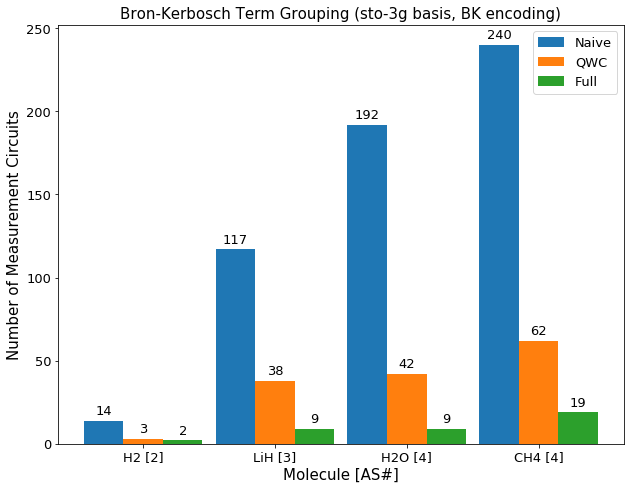

In [34]:
# copying the data printed out above
naive = (14,117,192,240)
qwc   = (3,38,42,62)
full  = (2,9,9,19)

xaxis = np.array((1,2,3,4))

width = 0.3

fig, ax = plt.subplots(figsize=(9,7))
rects1 = ax.bar(xaxis - width, naive, width, label='Naive')
rects2 = ax.bar(xaxis, qwc, width, label='QWC')
rects3 = ax.bar(xaxis + width, full, width, label='Full')

ax.set_ylabel('Number of Measurement Circuits')
ax.set_xlabel('Molecule [AS#]')
ax.set_title('Bron-Kerbosch Term Grouping (sto-3g basis, BK encoding)')
ax.set_xticks(xaxis)
ax.set_xticklabels(('H2 [2]', 'LiH [3]', 'H2O [4]', 'CH4 [4]'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

----
## Using NetworkX Poly-Time Heuristic

In [16]:
def print_cliques_x(filelist):
    for file in filelist:
        print('--------------')
        print(file)
        H = parseHamiltonian(file)
    
        # For some qubit encodings, there isn't a single term acting on all qubits
        # so this will report the wrong qubit#
        # Instead, look for the largest index being operated on.
        ops = [term[1] for term in H]
        #Nq = max([len(op) for op in ops])
        Nq = max([int(op[-1][1:]) for op in ops]) + 1
        print('{} qubits'.format(Nq))
    
        print('{} total terms\n'.format(len(H)))

        for commutativity_type, type_str in zip([QWCCommutativity, FullCommutativity],['QWC','FULL']):
            print(type_str + 'Commutation:')
            cliques = genMeasureCircuit(H, Nq, commutativity_type, clique_cover_method=NetworkX_approximate_clique_cover)
            print()

In [7]:
def many_trials(filename, commutativity_type, numtrials):
    H = parseHamiltonian(filename)
    ops = [term[1] for term in H]
    Nq = max([int(op[-1][1:]) for op in ops]) + 1
    print('--------------')
    print(filename)
    results = []
    runtimes = []
    for i in range(numtrials):
        start_time = time.time()
        cliques = genMeasureCircuit(H, Nq, commutativity_type, clique_cover_method=NetworkX_approximate_clique_cover)
        end_time = time.time()
        results += [len(cliques)]
        runtimes += [end_time - start_time]
    return Counter(results), runtimes

In [8]:
# What is the effect of term grouping across basis representations?

In [9]:
# What is the effect of term grouping across qubit encodings?
# First look at H2 molecule
Hfiles = ['hamiltonians/H2_6-31g_{}_0.7_AS4.txt'.format(e) for e in ['JW','BK','BKSF','BKT','PC']]

print_cliques_x(Hfiles)

--------------
hamiltonians/H2_6-31g_JW_0.7_AS4.txt
8 qubits
185 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 72 unique circuits
MEASURECIRCUIT: Elapsed time: 1.11s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 15 unique circuits
MEASURECIRCUIT: Elapsed time: 0.84s

--------------
hamiltonians/H2_6-31g_BK_0.7_AS4.txt
8 qubits
185 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 57 unique circuits
MEASURECIRCUIT: Elapsed time: 2.68s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 13 unique circuits
MEASURECIRCUIT: Elapsed time: 1.37s

--------------
hamiltonians/H2_6-31g_BKSF_0.7_AS4.txt
28 q

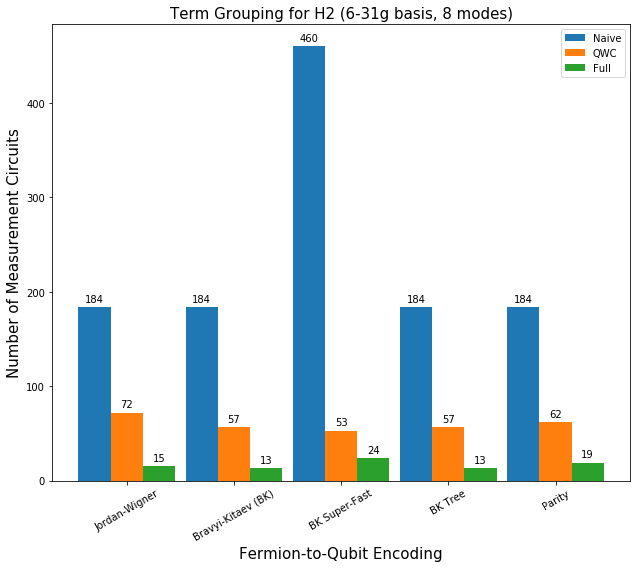

In [10]:
# copying the data printed out above
naive = (184,184,460,184,184)
qwc   = (72,57,53,57,62)
full  = (15,13,24,13,19)

xaxis = np.array((1,2,3,4,5))

width = 0.3

fig, ax = plt.subplots(figsize=(9,8))
rects1 = ax.bar(xaxis - width, naive, width, label='Naive')
rects2 = ax.bar(xaxis, qwc, width, label='QWC')
rects3 = ax.bar(xaxis + width, full, width, label='Full')

ax.set_ylabel('Number of Measurement Circuits')
ax.set_xlabel('Fermion-to-Qubit Encoding')
ax.set_title('Term Grouping for H2 (6-31g basis, 8 modes)')
ax.set_xticks(xaxis)
ax.set_xticklabels(('Jordan-Wigner', 'Bravyi-Kitaev (BK)', 'BK Super-Fast', 'BK Tree', 'Parity'),
                  rotation=30)
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [11]:
Hfiles = ['hamiltonians/H2_6-31g_JW_0.7_AS{}.txt'.format(a) for a in [1,2,3,4]]

print_cliques_x(Hfiles)

--------------
hamiltonians/H2_6-31g_JW_0.7_AS1.txt
2 qubits
4 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 3 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 1 unique circuits
MEASURECIRCUIT: Elapsed time: 0.00s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 3 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 1 unique circuits
MEASURECIRCUIT: Elapsed time: 0.00s

--------------
hamiltonians/H2_6-31g_JW_0.7_AS2.txt
4 qubits
15 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 1 unique circuits
MEASURECIRCUIT: Elapsed time: 0.00s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 2 unique circuits
MEASURECIRCUIT: Elapsed time: 0.01s

--------------
hamiltonians/H2_6-31g_JW_0.7_AS3.txt
6 qubits
62 total t

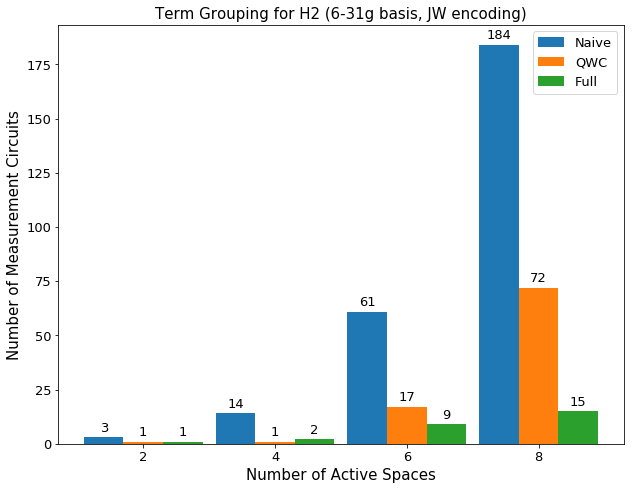

In [35]:
# copying the data printed out above
naive = (3,14,61,184)
qwc   = (1,1,17,72)
full  = (1,2,9,15)

# active spaces (x-axis)
# There is a weird naming convention...
# Openfermion lists active spaces as 1,2,3,4
# But, active spaces always come in pairs so there are actually
# twice as many spaces as what Openfermion says there is... its confusing
AS = np.array((1,2,3,4))

width = 0.3

fig, ax = plt.subplots(figsize=(9,7))
rects1 = ax.bar(AS - width, naive, width, label='Naive')
rects2 = ax.bar(AS, qwc, width, label='QWC')
rects3 = ax.bar(AS + width, full, width, label='Full')

ax.set_ylabel('Number of Measurement Circuits')
ax.set_xlabel('Number of Active Spaces')
ax.set_title('Term Grouping for H2 (6-31g basis, JW encoding)')
ax.set_xticks(AS)
ax.set_xticklabels(('2', '4', '6', '8'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# Plot multiple molecules together

In [13]:
# first we need to choose a tractable active space for each molecule
h2files = ['hamiltonians/H2_sto-3g_BK_0.7_AS{}.txt'.format(a) for a in [1,2]]
lihfiles = ['hamiltonians/LiH_sto-3g_BK_1.45_AS{}.txt'.format(a) for a in [1,2,3,4,5,6]]
h2ofiles = ['hamiltonians/H2O_sto-3g_BK_104_AS{}.txt'.format(a) for a in [1,2,3,4,5,6]]
ch4files = ['hamiltonians/CH4_sto-3g_BK_grnd_AS{}.txt'.format(a) for a in [1,2,3,4,5,6,7,8,9]]

In [17]:
# Based on the above results we will look at:
# H2: AS = 2
# LiH: AS = 3
# H2O: AS = 4
# CH4: AS = 4

fs = [h2files[1],lihfiles[2],h2ofiles[3],ch4files[3]]
print(fs)
print_cliques_x(fs)

['hamiltonians/H2_sto-3g_BK_0.7_AS2.txt', 'hamiltonians/LiH_sto-3g_BK_1.45_AS3.txt', 'hamiltonians/H2O_sto-3g_BK_104_AS4.txt', 'hamiltonians/CH4_sto-3g_BK_grnd_AS4.txt']
--------------
hamiltonians/H2_sto-3g_BK_0.7_AS2.txt
4 qubits
15 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 3 unique circuits
MEASURECIRCUIT: Elapsed time: 0.003326s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 2 unique circuits
MEASURECIRCUIT: Elapsed time: 0.003340s

--------------
hamiltonians/LiH_sto-3g_BK_1.45_AS3.txt
6 qubits
118 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 117 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 39 unique circuits
MEASURECIRCUIT: Elapsed time: 0.251704s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 

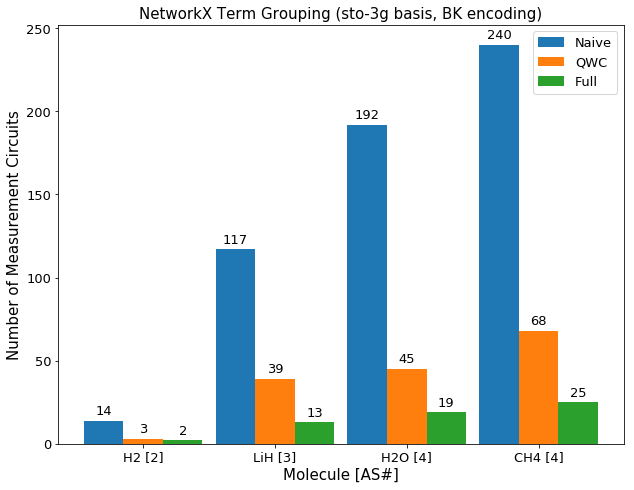

In [36]:
# copying the data printed out above
naive = (14,117,192,240)
qwc   = (3,39,45,68)
full  = (2,13,19,25)

xaxis = np.array((1,2,3,4))

width = 0.3

fig, ax = plt.subplots(figsize=(9,7))
rects1 = ax.bar(xaxis - width, naive, width, label='Naive')
rects2 = ax.bar(xaxis, qwc, width, label='QWC')
rects3 = ax.bar(xaxis + width, full, width, label='Full')

ax.set_ylabel('Number of Measurement Circuits')
ax.set_xlabel('Molecule [AS#]')
ax.set_title('NetworkX Term Grouping (sto-3g basis, BK encoding)')
ax.set_xticks(xaxis)
ax.set_xticklabels(('H2 [2]', 'LiH [3]', 'H2O [4]', 'CH4 [4]'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# Compare the runtimes between Bron-Kerbosch and NetworkX for the different Molecules

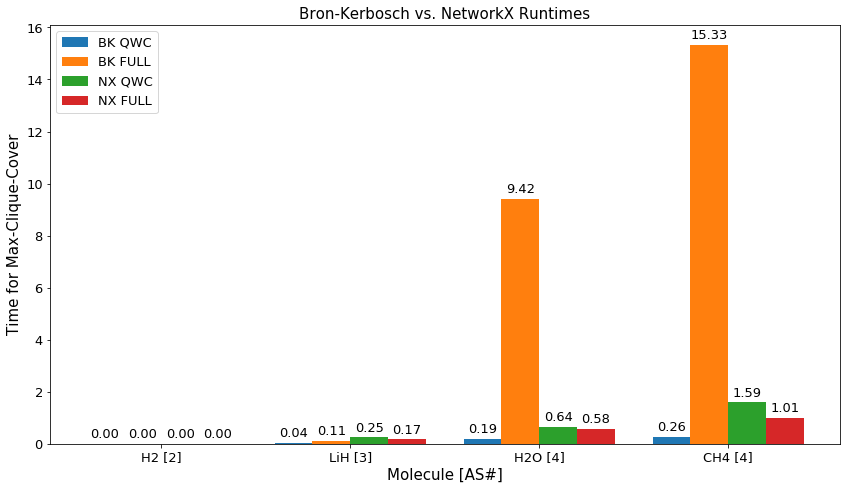

In [45]:
# copying the data printed out above
bk_qwc  = (0.001482,0.040986,0.187812,0.259468)
bk_full = (0.001200,0.109233,9.416595,15.331529)
nx_qwc  = (0.003326,0.251704,0.641773,1.589233)
nx_full = (0.003340,0.167520,0.581299,1.007746)

xaxis = np.array((1,2,3,4))

width = 0.2

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(xaxis - 1.5*width, bk_qwc, width, label='BK QWC')
rects2 = ax.bar(xaxis - 0.5*width, bk_full, width, label='BK FULL')
rects3 = ax.bar(xaxis + 0.5*width, nx_qwc, width, label='NX QWC')
rects4 = ax.bar(xaxis + 1.5*width, nx_full, width, label='NX FULL')

ax.set_ylabel('Time for Max-Clique-Cover')
ax.set_xlabel('Molecule [AS#]')
ax.set_title('Bron-Kerbosch vs. NetworkX Runtimes')
ax.set_xticks(xaxis)
ax.set_xticklabels(('H2 [2]', 'LiH [3]', 'H2O [4]', 'CH4 [4]'))
ax.legend(loc='upper left')


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

[Text(0, 0, 'H2 [2]'),
 Text(0, 0, 'LiH [3]'),
 Text(0, 0, 'H2O [4]'),
 Text(0, 0, 'CH4 [4]')]

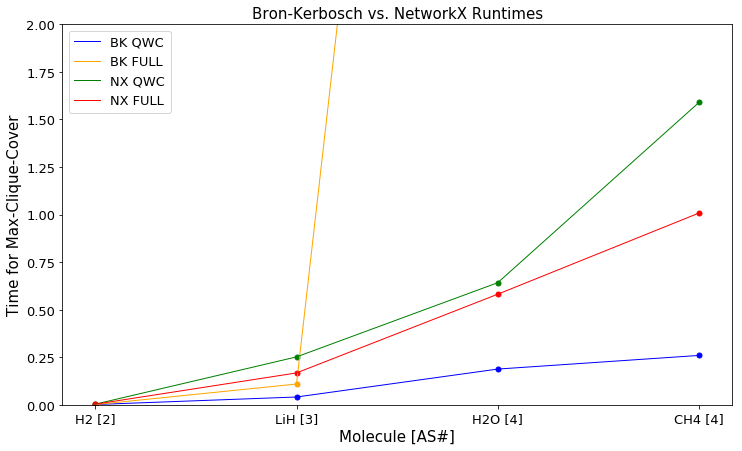

In [52]:
# plot same data as a line plot instead
bk_qwc  = (0.001482,0.040986,0.187812,0.259468)
bk_full = (0.001200,0.109233,9.416595,15.331529)
nx_qwc  = (0.003326,0.251704,0.641773,1.589233)
nx_full = (0.003340,0.167520,0.581299,1.007746)

xaxis = np.array((1,2,3,4))

colors = ['blue','orange','green','red']

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(xaxis,bk_qwc,c=colors[0],s=25)
ax.plot(xaxis,bk_qwc,c=colors[0],lw=1,label='BK QWC')
ax.scatter(xaxis,bk_full,c=colors[1],s=25)
ax.plot(xaxis,bk_full,c=colors[1],lw=1,label='BK FULL')
ax.scatter(xaxis,nx_qwc,c=colors[2],s=25)
ax.plot(xaxis,nx_qwc,c=colors[2],lw=1,label='NX QWC')
ax.scatter(xaxis,nx_full,c=colors[3],s=25)
ax.plot(xaxis,nx_full,c=colors[3],lw=1,label='NX FULL')

plt.legend()
ax.set_ylim([0,2])
ax.set_ylabel('Time for Max-Clique-Cover')
ax.set_xlabel('Molecule [AS#]')
ax.set_title('Bron-Kerbosch vs. NetworkX Runtimes')
ax.set_xticks(xaxis)
ax.set_xticklabels(('H2 [2]', 'LiH [3]', 'H2O [4]', 'CH4 [4]'))

In [ ]:
# I will generate this data later (will take ~60 minutes to complete).
# Then we can compare average runtimes.
results = []
for file in Hfiles:
    for comm_type, comm_str in zip([QWCCommutativity, FullCommutativity], ['QWC','FULL']):
        ret, times = many_trials(file, comm_type, 100)
        results += [(file,comm_str,ret,times)]

print('\n\n-------------------')
print('All trials finished')
for r in results:
    print(r[0],r[1],r[2],np.mean(r[3]))